<a href="https://colab.research.google.com/github/Samranali/PDS/blob/main/ICP2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import matplotlib.ticker as ticker
import seaborn as sns
import plotly.express as px

In [ ]:
df_global = pd.read_csv('https://raw.githubusercontent.com/datasets/covid-19/master/data/countries-aggregated.csv', parse_dates=['Date'])
df_global

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-23,Afghanistan,0,0,0
2,2020-01-24,Afghanistan,0,0,0
3,2020-01-25,Afghanistan,0,0,0
4,2020-01-26,Afghanistan,0,0,0
...,...,...,...,...,...
161563,2022-04-12,Zimbabwe,247094,0,5460
161564,2022-04-13,Zimbabwe,247160,0,5460
161565,2022-04-14,Zimbabwe,247208,0,5462
161566,2022-04-15,Zimbabwe,247237,0,5462


In [ ]:
countries = ['Brazil', 'Germany', 'United Kingdom', 'US', 'Italy', 'China']
df_regional = df_global[df_global['Country'].isin(countries)]

# Creating a Summary Column
df_regional['Cases'] = df_regional[['Confirmed', 'Recovered', 'Deaths']].sum(axis=1)

<ipython-input-4-6b9eee60b56f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_regional['Cases'] = df_regional[['Confirmed', 'Recovered', 'Deaths']].sum(axis=1)


In [ ]:
df_regional

,Date,Country,Confirmed,Recovered,Deaths,Cases
19584,2020-01-22,Brazil,0,0,0,0
19585,2020-01-23,Brazil,0,0,0,0
19586,2020-01-24,Brazil,0,0,0,0
19587,2020-01-25,Brazil,0,0,0,0
19588,2020-01-26,Brazil,0,0,0,0
...,...,...,...,...,...,...
153403,2022-04-12,United Kingdom,21846115,0,171004,22017119
153404,2022-04-13,United Kingdom,21883579,0,171662,22055241
153405,2022-04-14,United Kingdom,21916961,0,172014,22088975
153406,2022-04-15,United Kingdom,21916961,0,172014,22088975


In [ ]:
df_regional = df_regional.pivot(index='Date', columns='Country', values='Cases')
countries = list(df_regional.columns)
print(countries)
df_regional

['Brazil', 'China', 'Germany', 'Italy', 'US', 'United Kingdom']


Country,Brazil,China,Germany,Italy,US,United Kingdom
Date,,,,,,
2020-01-22,0,593,0,0,1,0
2020-01-23,0,691,0,0,1,0
2020-01-24,0,982,0,0,2,0
2020-01-25,0,1487,0,0,2,0
2020-01-26,0,2180,0,0,5,0
...,...,...,...,...,...,...
2022-04-12,30846027,1669001,23149457,15565841,81464184,22017119
2022-04-13,30872838,1695023,23315135,15628582,81506332,22055241
2022-04-14,30896067,1718871,23472211,15694348,81561653,22088975


In [ ]:
covid = df_regional.reset_index('Date')
covid.set_index(['Date'], inplace=True)
covid.columns = countries
covid

,Brazil,China,Germany,Italy,US,United Kingdom
Date,,,,,,
2020-01-22,0,593,0,0,1,0
2020-01-23,0,691,0,0,1,0
2020-01-24,0,982,0,0,2,0
2020-01-25,0,1487,0,0,2,0
2020-01-26,0,2180,0,0,5,0
...,...,...,...,...,...,...
2022-04-12,30846027,1669001,23149457,15565841,81464184,22017119
2022-04-13,30872838,1695023,23315135,15628582,81506332,22055241
2022-04-14,30896067,1718871,23472211,15694348,81561653,22088975


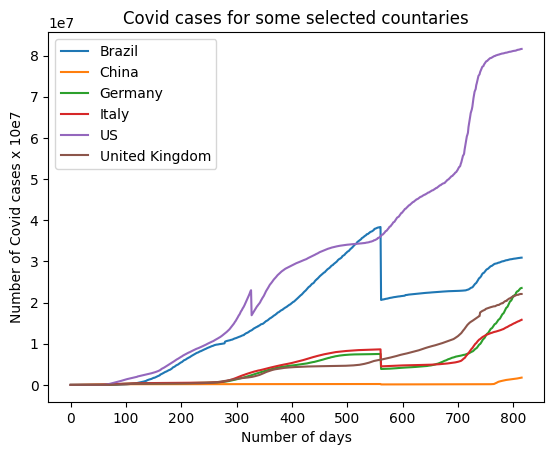

In [ ]:
# get columns to plot
columns = covid.columns
# create x data
x_data = range(0, covid.shape[0])
# create figure and axis
fig, ax = plt.subplots()
# plot each column
for column in columns:
    ax.plot(x_data, covid[column], label=column)
# set title and legend
ax.set_title('Covid cases for some selected countaries')
ax.set_xlabel('Number of days')
ax.set_ylabel('Number of Covid cases x 10e7')
ax.legend()

Plotting the line plot for the data where on the x-axis we have the number of days and on the y-axis we have the number of the cases.

In [ ]:
px.line(covid, x=x_data, y=columns, title="Covid cases for some selected countries", height=400)

<Axes: xlabel='Date'>

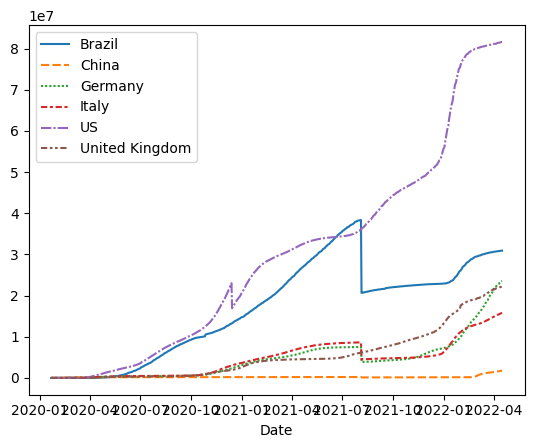

In [ ]:
sns.lineplot(data=covid)

Here we are plotting the same data using the plotly scatter plot function.

In [ ]:
px.scatter(covid, x=x_data, y=columns, title="Covid cases for some selected countries")